In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date='ut20160811'
#obs_date='ut20160922'
obj_name='Wasp52'

midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


# TSpec plots -----------------------------------------

In [9]:
print len(exo_w_R)

1154


(4000, 8000)

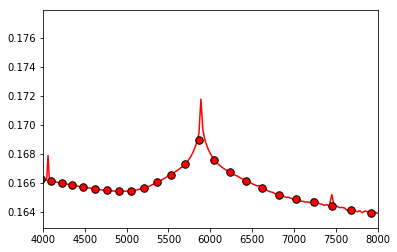

In [16]:
start=4400
end=8000
width=100

R=4
P=30

#from Binning_Model import BinFun


exo_w=np.genfromtxt(SAVEPATH+'PLOTS/models/W52_noK.dat',usecols=[0],skip_header=1)*10**10.
exo_d=(np.genfromtxt(SAVEPATH+'PLOTS/models/W52_noK.dat',usecols=[1],skip_header=1)/100.)**(1./2.)

exo_w_R=np.empty([len(exo_w)/R])
exo_d_R=np.empty([len(exo_d)/R])

exo_w_P=np.empty([len(exo_w)/P])
exo_d_P=np.empty([len(exo_d)/P])

z=0
for w in range(0,len(exo_w_R)):
    exo_w_R[w]=np.nanmedian(exo_w[z:z+R])
    exo_d_R[w]=np.nanmedian(exo_d[z:z+R])
    z+=R
    
z=0
for w in range(0,len(exo_w_P)):
    exo_w_P[w]=np.nanmedian(exo_w[z:z+P])
    exo_d_P[w]=np.nanmedian(exo_d[z:z+P])
    z+=P

#exo_w_P,exo_d_P=BinFun(exo_d_R,exo_w_R,start,end,width)

plt.clf()
plt.cla()
plt.plot(exo_w_R,exo_d_R,color='red')
plt.plot(exo_w_P,exo_d_P,'.',markerfacecolor='red',markeredgecolor='black',markersize=15)
plt.xlim(4000,8000)

In [52]:
import pickle

W52=pickle.load(open(SAVEPATH+'PLOTS/models/wasp52b.pickle'))
W52_spec=W52['spectra']
Tetal_rads=(((W52_spec['data_1'])['high'])['depth'])**(1./2.)
Tetal_errs=(((W52_spec['data_1'])['high'])['error'])
Tetal_errs=(0.5*Tetal_rads**(-1./2.))*Tetal_errs

Tetal_wavs=((W52_spec['data_1'])['high'])['wavelength']*10000.
Tetal_widt=((W52_spec['data_1'])['high'])['width']

Letal_wavs=np.linspace(4125,8625,19)
Letal_rads=np.array([0.1643,0.1632,0.1656,0.1641,0.1629,0.1619,0.1641,0.1639,0.1638,0.1640,0.1630,0.1645,0.1646,0.1652,0.1651,0.1660,0.1658,0.1664,0.1675])
Letal_errs=np.array([14,13,12,10,9,8,11,10,7,9,6,7,8,8,8,6,7,16,16])/10000.

Cetal_wavs=np.array([5306,5471,5636,5800,5891,5981,6147,6312,6477,6642,6807,6972,7137,7302,7467,7665,7682,7699,7790,7955,8120,8285,8450,8615,8780,8945])
Cetal_widt=np.array([165,165,165,165,16,165,165,165,165,165,165,165,165,165,165,16,18,16,165,165,165,165,165,165,165,165])
Cetal_rads=np.array([0.1624,0.1624,0.1608,0.1588,0.1717,0.1596,0.1610,0.1611,0.1604,0.1616,0.1617,0.1635,0.1613,0.1614,0.1608,0.1651,0.1608,0.1626,0.1623,0.1595,0.1609,0.1598,0.1609,0.1599,0.1612,0.1606])
Cetal_errs=np.array([15,16,19,11,30,16,9,8,8,7,11,12,11,11,9,20,21,21,11,11,12,10,12,16,16,16])/10000.

Cetal_rads+=0.004

In [53]:
print Tetal_wavs

[ 11262.5  11477.5  11686.   11888.   12083.5  12275.   12464.5  12655.
  12847.5  13038.   13226.   13414.5  13605.   13800.5  14000.   14201.5
  14406.   14615.   14831.   15053.   15280.   15515.5  15762.5  16021.
  16294.5]


36


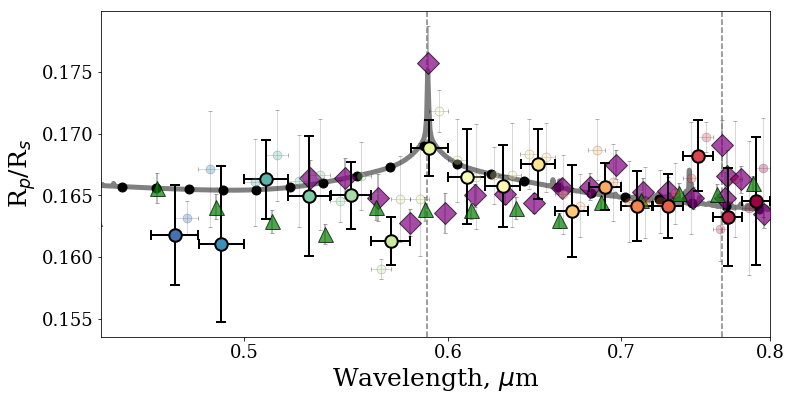

In [59]:
width=100
em=10.



#mfile='HATS8b_1em1S.dat'
#model=(np.genfromtxt(SAVEPATH+mfile,usecols=[1],skip_header=2)/100)**(1./2.)
#mwave=np.genfromtxt(SAVEPATH+mfile,usecols=[0],skip_header=2)*10**10.


from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import os



bin_ctr_200=np.load(SAVEPATH+'LC_bins_br_200.npz')['bin_ctr']
dt_e_p_200=np.nanmedian(np.load(SAVEPATH+'LC_bins_br_200.npz')['err_p'],axis=0)
dt_e_t_200=np.nanmedian(np.load(SAVEPATH+'LC_bins_br_200.npz')['err_t'],axis=0)
             
rp_200=np.empty([len(bin_ctr_200)])
rp_e_200=np.empty([len(bin_ctr_200)])
rs_e_200=np.empty([len(bin_ctr_200)])

bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
dt_e_p=np.nanmedian(np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['err_p'],axis=0)
dt_e_t=np.nanmedian(np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['err_t'],axis=0)
             
rp=np.empty([len(bin_ctr)])
rp_e=np.empty([len(bin_ctr)])
rs_e=np.empty([len(bin_ctr)])

norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr_200),vmax=np.max(bin_ctr_200))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

print len(bin_ctr)

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            rbwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
        else:
            rp[b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['params'])[2]
            rp_e[b]=np.nanmedian((np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['paramserr'])[2])
            rs_e[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['residuals']))*10**-6
            b+=1
            
b=0
for file in os.listdir(SAVEPATH+'Fits_200/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr_200):
            rbwhite_200=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
        else:
            rp_200[b]=(np.load(SAVEPATH+'Fits_200/'+file)['params'])[2]
            rp_e_200[b]=np.nanmedian((np.load(SAVEPATH+'Fits_200/'+file)['paramserr'])[2])
            rs_e_200[b]=np.abs(np.nanmedian(np.load(SAVEPATH+'Fits_200/'+file)['residuals']))*10**-6
            b+=1
            
owave=np.logspace(4000,9000,1000)

wavelog=np.log(bin_ctr)
rays=np.polyfit(wavelog,rp,1)
ray=(np.poly1d(rays))(wavelog)
#tests=(np.poly1d(test))(np.log(mwave))

lins=np.polyfit(wavelog,rp,0)
lin=(np.poly1d(lins))(wavelog)


###########################
#sys.path.insert(0,SAVEPATH) 
#from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g
muj=2.3                #mu of jupiter

# Rs is in cm

#-----W4, int=0.1735
#Rs=6.4*10**10.
#Tplan=1600.   #temperature of planet in K
#gplan=1707.   # gravity in cm/s^2

#------W52
Rs=5.5*10**10.
Tplan=1300.   #temperature of planet in K
gplan=707.   # gravity in cm/s^2

slope=(alpha/Rs)*(kb*Tplan)/((muj*mh)*gplan)

raya=(np.poly1d([slope,0.206]))(wavelog)
#########################

chi_rayfit=np.nansum((ray-rp)**2.)
chi_flat=np.nansum((lin-rp)**2.)
chi_act=np.nansum((raya-rp)**2.)

#xerr1=np.zeros_like(bin_ctr)
#xerr2=np.zeros_like(bin_ctr)
xerr1=np.abs(np.log(bin_ctr/(bin_ctr-width/2.)))
xerr2=np.abs(np.log(bin_ctr_200/(bin_ctr_200+100.)))
                
            
            
plt.figure(figsize=(12,6)) 
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,5.25)) #half page size

#plt.plot(wavelog,ray,color='grey',linewidth=3.0)
#plt.plot(wavelog,lin,color='grey',linewidth=3.0,linestyle='-')
#plt.plot(wavelog,raya,color='grey',linewidth=3.0,linestyle='--')

plt.plot(np.log(exo_w),exo_d,color='gray',linewidth=5.0)
plt.plot(np.log(exo_w_P),exo_d_P,'.',markersize=18,markerfacecolor='black',markeredgecolor='black')
#plt.plot(np.log(mwave),model,color='dimgrey',linewidth=2.0,linestyle='--')

plt.plot(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads,'s',markersize=15,markeredgecolor='black',markerfacecolor='orange',zorder=8,alpha=0.7)
plt.errorbar(np.log(Tetal_wavs+Tetal_widt/2.),Tetal_rads, yerr=Tetal_errs,zerr=Tetal_widt/2.,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

plt.plot(np.log(Letal_wavs),Letal_rads,'^',markersize=15,markeredgecolor='black',markerfacecolor='green',zorder=10,alpha=0.7)
plt.errorbar(np.log(Letal_wavs),Letal_rads, yerr=Letal_errs,zerr=125.*10**(-4.),capsize=2,ecolor='grey',fmt='None',zorder=9,alpha=0.7)

plt.plot(np.log(Cetal_wavs),Cetal_rads,'D',markersize=15,markeredgecolor='black',markerfacecolor='purple',zorder=8,alpha=0.7)
plt.errorbar(np.log(Cetal_wavs),Cetal_rads, yerr=Cetal_errs,zerr=Cetal_widt,capsize=2,ecolor='grey',fmt='None',zorder=7,alpha=0.7)

for b in range(0,len(bin_ctr)):
    if b==0 or b==1 or b==2 or b==5:
        continue
    #if b==0 or b==1 or b==2 or b==3 or b==4 or b==5 or b==6 or b==10 or b==11 or b==24 or b==64:# or b==3 or b==11 or b==17:
    #    continue
    plt.plot(np.log(bin_ctr[b]),rp[b],'.', markeredgewidth=0.5,markersize=18,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),alpha=0.3,zorder=11)
    plt.errorbar(np.log(bin_ctr[b]),rp[b],yerr=em*(rp_e[b]+rs_e[b]+dt_e_t[b]),xerr=xerr1[b],color='black',elinewidth=0.5,capsize=2.0,capthick=1.0,alpha=0.3,zorder=10)

for b in range(0,len(bin_ctr_200)):
    if b==0:# or b==1 or b==3 or b==11 or b==17:
        continue
    plt.plot(np.log(bin_ctr_200[b]),rp_200[b],'.', markeredgewidth=2.0,markersize=25,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr_200[b]),zorder=11)
    plt.errorbar(np.log(bin_ctr_200[b]),rp_200[b],yerr=em*(rp_e_200[b]+rs_e_200[b]+dt_e_t_200[b]),xerr=xerr2[b],color='black',elinewidth=2.0,capsize=5.0,capthick=2.0,zorder=10)
plt.axvline(x=np.log(5890),linestyle='--',color='grey')
plt.axvline(x=np.log(7665),linestyle='--',color='grey')

plt.xticks(np.log([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=18,fontproperties=font)
plt.xlim(np.log(4400),np.log(8000))

plt.yticks(fontsize=18,fontproperties=font)
#plt.ylim(0.08,0.15)  #Hats8b
#plt.ylim(0.16,0.18)
#plt.figtext(0.20,0.45,'Solar Composition Atmosphere,',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.20,0.40,'Increased Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.figtext(0.15,0.20,'Standard Scattering Properties',fontsize=15, fontproperties=font, color='dimgrey')
#plt.annotate('Na',xy=(np.log(5900),0.13),xytext=(np.log(6000),0.145),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
#plt.annotate('K',xy=(np.log(7700),0.125),xytext=(np.log(8000),0.135),arrowprops=dict(facecolor='black', shrink=0.01,width=1.5),fontsize=12,fontproperties=font)
plt.ylabel('R$_p$/R$_s$',fontsize=25,fontproperties=font)

#plt.figtext(0.15,0.27,'Rayleigh Fit, -',color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.82,'Flat Spectra, -', color='grey',fontsize=15,fontproperties=fontb)
#plt.figtext(0.13,0.77,'Nominal Rayleigh, --', color='grey',fontsize=15,fontproperties=fontb)

plt.xlabel('Wavelength, $\mu$m',fontsize=25,fontproperties=font)
#plt.show()
plt.savefig(SAVEPATH+'PLOTS/TSpec_alldata'+str(int(width))+'.pdf')        

(4000, 8000)

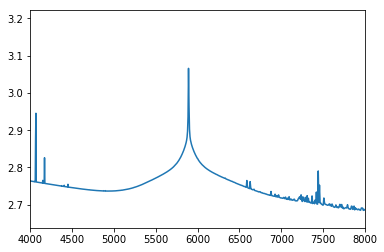

In [15]:
test_w=np.genfromtxt(SAVEPATH+'PLOTS/models/W52_noK.dat',usecols=[0],skip_header=1)*10**10.
test_d=np.genfromtxt(SAVEPATH+'PLOTS/models/W52_noK.dat',usecols=[1],skip_header=1)

plt.plot(test_w,test_d)
plt.xlim(4000,8000)

In [125]:
chi_rayfit=np.nansum((ray-rp)**2.)
chi_flat=np.nansum((lin-rp)**2.)
chi_act=np.nansum((raya-rp)**2.)

print chi_rayfit
print chi_flat
print chi_act

0.000788551558082
0.000817345547236
0.000796504645556


In [97]:
slope=rays[0]

import sys
 

sys.path.insert(0,SAVEPATH) 
from SystemCons import *

alpha=-4.
kb=1.380658*10**-16   #boltzmann constant, erg/K
mh=1.6726*10**-24     #mass of hydrogen in g

# Rs is in cm
Tplan=1200.   #temperature of planet in K
gplan=1707.   # gravity in cm/s^2

mumh=(slope/alpha)*(Rs*gplan)/(kb*Tplan)

print mumh*mh,mumh


1.22192099011 7.30551829554e+23


# LC plots -----------------------------------------

18
[ 4400.  4600.  4800.  5000.  5200.  5400.  5600.  5800.  6000.  6200.
  6400.  6600.  6800.  7000.  7200.  7400.  7600.  7800.  8000.  8200.
  8400.]


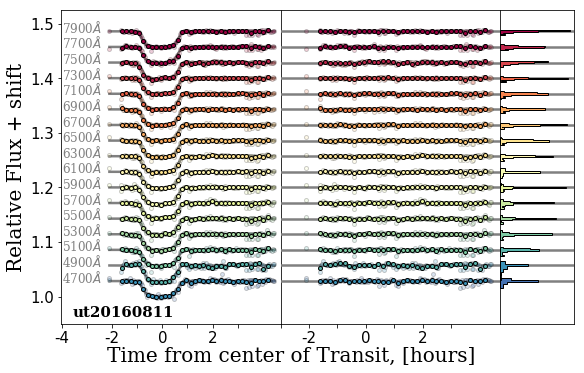

In [163]:
width=200
##############

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

import matplotlib.gridspec as gridspec

import os
###############

lc_data_binns=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['data']

t_z=np.load(SAVEPATH+'LCwhite_br_Corr.npz')['avt']
            
#lc_data_white_z=np.load(SAVEPATH+'LCwhite_br_Corr.npz')['avf']
lc_data_binns_z=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'_Corr.npz')['avf']


bin_arr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bins']
bin_ctr=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['bin_ctr']
n_bins=len(bin_ctr)

print n_bins

bin_arr=np.append(bin_arr,[bin_arr[-1]+width,bin_arr[-1]+2*width])
print bin_arr

###############
norm=matplotlib.colors.Normalize(vmin=np.min(bin_ctr),vmax=np.max(bin_ctr))                                                                                                                 
colors=matplotlib.cm.Spectral_r
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

t=np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(t)

lc_fit=np.empty([n_exp,n_bins])
lc_fit_z=np.empty([len(t_z),n_bins])
lc_data=np.empty([n_exp,n_bins])

shift=np.linspace(0,n_bins/35., n_bins+1)

###############

b=0
for file in os.listdir(SAVEPATH+'Fits_'+str(int(width))+'/'):
    if file.endswith('.npz'):
        if b==len(bin_ctr):
            lcwhite=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
        else:
            lc_fit[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/'+file)['lightcurve_fit'])
            lc_fit_z[:,b]=(np.load(SAVEPATH+'Fits_'+str(int(width))+'/z=4/'+file)['lcfitz'])
            b+=1


#plt.figure(figsize=(8.5,11))
#plt.figure(figsize=(10,7.5))
#plt.figure(figsize=(8,10.5)) #full page size
#plt.figure(figsize=(8,7.875))
plt.figure(figsize=(8,5.25)) #half page size
#plt.figure(figsize=(8,3.5)) #third page size

plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.1,right=0.99)
gs1=gridspec.GridSpec(1,7)
gs1.update(wspace=0.00,hspace=0.0)

ymin=0.95
ymax=1.01

p0=plt.subplot(gs1[:,:3])
for b in range(0,n_bins):
    if b==0:# or b==1:
        continue
    p0=plt.plot(24*t[:],lc_fit[:,b]+shift[b],'-',linewidth=2.5,color='grey',zorder=10)
    p0=plt.plot(24*t[:-1],lc_data_binns[:-1,b]+shift[b],'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.2)
    p0=plt.plot(24*t_z[:-1],lc_data_binns_z[:-1,b]+shift[b],'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    #p0=plt.errorbar(24*t[:-1],lc_data_binns[:-1,b]+shift[b],yerr=errs_l_t[:-1,b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    p0=plt.xlim((t[0]-0.08)*24,(t[-1]+0.01)*24)
    p0=plt.ylim(ymin,ymax+shift[-1])
    p0=plt.ylabel('Relative Flux + shift',fontsize=20,fontproperties=font)
    p0=plt.yticks(fontsize=15)
    #p0=plt.xticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4],['','','-4','', '-2','','0','','2','','4'],fontsize=15)
    #p0=plt.xticks([-4,-3,-2,-1,0,1,2,3,4],['-4','', '-2','','0','','2','','4'],fontsize=15)
    p1=plt.xticks([-4,-3,-2,-1,0,1,2,3],['-4','','-2','','0','','2',''],fontsize=15)
    p0=plt.annotate(str(int(bin_ctr[b]))+'$\AA$',xy=(-4.0,1.0+shift[b]-0.002),ha='left',fontproperties=font,color='grey',fontsize=12)
    
residuals=lc_data_binns-lc_fit
residuals_z=lc_data_binns_z-lc_fit_z

p1=plt.subplot(gs1[:,3:6])
for b in range(0,n_bins):
    if b==0:# or b==1:
        continue
    p1=plt.axhline(y=np.nanmean((residuals[:-1,b])+shift[b]),color='grey',linewidth=2.5,zorder=10)
    p1=plt.plot(24*t[:-1],(residuals[:-1,b])+shift[b],'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]),zorder=11,alpha=0.2)
    p1=plt.plot(24*t_z[:-1],(residuals_z[:-1,b])+shift[b],'.',markeredgewidth=1.0,markersize=8,markeredgecolor='black', markerfacecolor=scal_m.to_rgba(bin_ctr[b]+width),zorder=12)
    #p1=plt.errorbar(24*t[:-1],(residuals[:-1,b])+shift[b],yerr=errs_l_t[:-1,b],ecolor=scal_m.to_rgba(bin_ctr[b]),elinewidth=0.5,alpha=0.7,fmt=None,zorder=11)
    p1=plt.yticks([],[])
    p1=plt.xticks([-3,-2,-1,0,1,2,3],['','-2','','0','','2',''],fontsize=15)
    p1=plt.ylim(ymin-1.0,ymax-1.0+shift[-1])

p2=plt.subplot(gs1[:,6])
for b in range(0,n_bins):
    #if b==0 or b==1:
    #    continue
    finite=residuals[np.isfinite(residuals[:,b]),b]
    p2=plt.axhline(y=np.nanmean((residuals[:-1,b])+shift[b]),color='grey',linewidth=2.5,zorder=10)
    p2=plt.hist((finite[:-1]+shift[b]),bins=7,orientation='horizontal',histtype='stepfilled',edgecolor='black',facecolor=scal_m.to_rgba(bin_ctr[b]),normed=True,zorder=11)
    p2=plt.ylim(ymin-1.0,ymax-1.0+shift[-1])
    p2=plt.yticks([],[])
    p2=plt.xticks([],[])
#plt.ylim(0.98,1.01+shift[-1])

plt.figtext(0.12,0.14,'ut20160811',fontsize=15,fontproperties=fontb,color='black')

plt.figtext(0.5,0.02,'Time from center of Transit, [hours]', fontsize=20, ha='center',fontproperties=font)
plt.savefig(SAVEPATH+'PLOTS/all_lcs_err_'+str(int(width))+'.pdf')    

In [159]:
print len(t_z)

36


# Spectra Plots -----------------

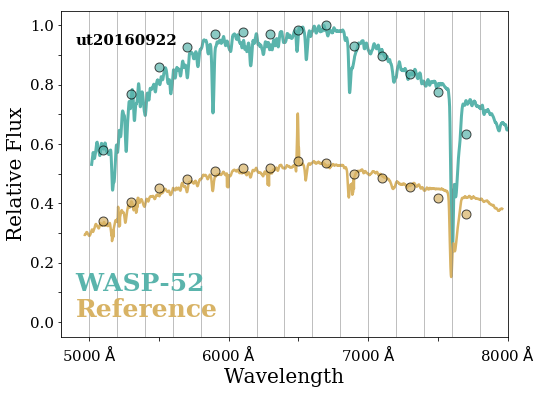

In [180]:
corr=False
width_bin=200

import scipy.signal

from matplotlib.font_manager import FontProperties
font0=FontProperties()
font=font0.copy()
font.set_family('serif')

fontb=font.copy()
fontb.set_weight('bold')

if corr==True:
    cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['convolved']
    #cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['data']
    wav_arr=np.load(SAVEPATH+'ShiftedSpec_All_Corr.npz')['wave']
    ptn_err=np.load(SAVEPATH+'FlattenedSpectra_Corr.npz')['pht_err']
    tot_err=np.load(SAVEPATH+'FlattenedSpectra_Corr.npz')['tot_err']
    binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bin_counts']
    bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bins']
    bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'_Corr.npz')['bin_centers']
else:
    cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['convolved']
    #cnt_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['data']
    wav_arr=np.load(SAVEPATH+'ShiftedSpec_All.npz')['wave']
    ptn_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['pht_err']
    tot_err=np.load(SAVEPATH+'FlattenedSpectra.npz')['tot_err']
    binns=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_counts']
    bin_a=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bins']
    bin_c=np.load(SAVEPATH+'Binned_Data_'+str(int(width_bin))+'.npz')['bin_centers']

cnt_arr=np.flip(cnt_arr,axis=2)
wav_arr=np.flip(wav_arr,axis=2)

#Wasp52
#-------
Cals_ind=[2]
#Cals_ind=[2,3,5,8]  
#csn=2

#Wasp4
#------
#1,4,5,7,8,10,11,12
#USE: 5,
#Cals_ind=[5]

#HatP26b
#-----
#1,2,3,4,5,6,7
# X 1
#------
#Cals_ind=[2,3,4,5,6]
#csn=2

#Cals=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_t=np.zeros_like(cnt_arr[0,0,:])
#errs_cw_p=np.zeros_like(cnt_arr[0,0,:])
#for c in Cals_ind:
#    Cals=(np.nansum([Cals,cnt_arr[c,0,:]],axis=0))
#    errs_cw_t=np.sqrt(np.nansum([errs_cw_t,tot_err[c,0,:]**2.],axis=0))
#    errs_cw_p=np.sqrt(np.nansum([errs_cw_p,ptn_err[c,0,:]**2.],axis=0))

plt.figure(figsize=(8,6))

t=100
tar=scipy.signal.medfilt(cnt_arr[0,t,:]/np.nanmax(cnt_arr[0,t,:]),kernel_size=1)

#r1=1865
#r2=1878
#tar[r1:r2+1]=np.nan

tarc='#5ab4ac'
calc='#d8b365'

#for t in range(0,wav_arr.shape[1]):
plt.plot(wav_arr[0,t,:],tar,linewidth=3.0,color=tarc)
#for p in range(0,len(wav_arr[0,t,:])):
#    plt.annotate(p,xy=(wav_arr[0,t,p],tar[p]))
for c in Cals_ind:
    plt.plot(wav_arr[c,t,:],cnt_arr[c,t,:]/np.nanmax(cnt_arr[0,t,:]),linewidth=2.5,color=calc)

#plt.axvline(x=7593.7,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6867.19,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=6562.81,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5895.9,color='grey',linewidth=0.5,linestyle='--')
#plt.axvline(x=5889.9,color='grey',linewidth=0.5,linestyle='--')

for b in range(0,len(bin_a)):
    plt.axvline(x=bin_a[b],color='grey',linewidth=0.5)

for b in range(0,len(bin_c)):
    if b==1:
        continue
    plt.plot(bin_c[b],binns[t,b,0]/np.nanmax(binns[t,:,0]),'.',markersize=18,markeredgecolor='black',markerfacecolor=tarc,alpha=0.7)
    for c in Cals_ind:
        plt.plot(bin_c[b],binns[t,b,c]/np.nanmax(binns[t,:,0]),'.',markersize=18,markeredgecolor='black',markerfacecolor=calc,alpha=0.7)

plt.xticks([5000,5500,6000,6500,7000,7500,8000],['5000 $\mathrm{\AA}$','','6000 $\mathrm{\AA}$','','7000 $\mathrm{\AA}$','','8000 $\mathrm{\AA}$'],fontsize=15,fontproperties=font)
plt.xlabel('Wavelength',fontsize=20,fontproperties=font)

plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],['0.0','','0.2','','0.4','','0.6','','0.8','','1.0'],fontsize=15,fontproperties=font)
plt.ylabel('Relative Flux',fontsize=20,fontproperties=font)

plt.figtext(0.15,0.23,'WASP-52',fontsize=25,fontproperties=fontb,color=tarc)
plt.figtext(0.15,0.17,'Reference',fontsize=25,fontproperties=fontb,color=calc)

plt.figtext(0.15,0.8,'ut20160922',fontsize=15,fontproperties=fontb,color='black')

plt.xlim(4800,8000)

plt.savefig(SAVEPATH+'PLOTS/Spectra_'+str(int(width_bin))+'.pdf')

In [42]:
o=0
fwhm_arr=np.load(SAVEPATH+'SpectraFitParams_'+str(int(o))+'.npz')['fwhm_av']
print fwhm_arr.shape

(112,)


In [58]:
print len(bin_a)

17
